In [1]:
import pandas as pd
import numpy as np
# from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
# import traceback
# from sklearn.preprocessing import StandardScaler

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import data

In [3]:
df_title_basics = pd.read_csv('/content/drive/MyDrive/PROJET2 /SUBSETS/title_basics_subsets/title_basics_subset_movies.csv')

In [4]:
df_title_ratings = pd.read_csv('/content/drive/MyDrive/PROJET2 /SUBSETS/df_title_ratings.csv', sep=';')

In [5]:
df_title_akas = pd.read_csv('/content/drive/MyDrive/PROJET2 /SUBSETS/title_akas_subset/subset_title_akasV2.csv', sep=';')

In [6]:
df_tmdb = pd.read_csv('/content/drive/MyDrive/PROJET2 /tmdb_full.csv',low_memory=False)

In [30]:
df_director = pd.read_csv('/content/drive/MyDrive/PROJET2 /SUBSETS/title_principals_subsets/NEW/subset_director.csv',low_memory=False, sep=";")

In [31]:
pd.set_option('display.max_columns', None)
display(df_title_basics.head(3))
display(df_title_ratings.head(3))
display(df_title_akas.head(3))
display(df_tmdb.head(3))
display(df_director.head(3))

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000009,Miss Jerry,0.0,1894.0,45.0,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,0.0,1897.0,100.0,"Documentary,News,Sport"
2,tt0000574,The Story of the Kelly Gang,0.0,1906.0,70.0,"Action,Adventure,Biography"


,tconst,averageRating,numVotes
0,tt0000001,5.7,2063
1,tt0000002,5.6,279
2,tt0000003,6.5,2030


,titleId,region,title
0,tt0000002,FR,Le clown et ses chiens
1,tt0000003,FR,Pauvre Pierrot
2,tt0000004,FR,Un bon bock


,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,2.852,/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg,['US'],1938-11-30,0,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']
1,False,NaN,0,['Adventure'],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,1.091,/6xUbUCvndklbGVYiljHr34NTxSl.jpg,['DE'],1921-01-01,0,420,[],Released,NaN,"Peter Voss, Thief of Millions",False,0.000,0,[],[]
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"['Drama', 'Romance']",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,"['DE', 'FR', 'IT', 'JP', 'PL']",1962-06-22,0,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese...","['', 'NZ', 'IT', 'JP', 'DE', 'PL', '']"


,tconst,nconst,category,characters
0,tt0000001,nm0005690,director,NaN
1,tt0000002,nm0721526,director,NaN
2,tt0000003,nm0721526,director,NaN


In [32]:
print(df_title_basics.info())
print(df_title_ratings.info())
print(df_title_akas.info(verbose = True, show_counts= True))
print(df_tmdb.info(verbose = True, show_counts= True))
print(df_director.info(verbose = True, show_counts= True))

<class 'pandas.core.frame.DataFrame'>
Index: 740871 entries, 0 to 740872
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          740871 non-null  object 
 1   primaryTitle    740871 non-null  object 
 2   isAdult         740871 non-null  float64
 3   startYear       740871 non-null  float64
 4   runtimeMinutes  740871 non-null  float64
 5   genres          740871 non-null  object 
dtypes: float64(3), object(3)
memory usage: 39.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453791 entries, 0 to 1453790
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1453791 non-null  object 
 1   averageRating  1453791 non-null  float64
 2   numVotes       1453791 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772661 e

In [9]:
# suppression des colonnes que l'on ne veut pas utiliser
df_title_basics = df_title_basics.drop(columns=['titleType','originalTitle'], axis=1)

In [10]:
# suppression des lignes avec NaN
df_title_basics = df_title_basics.dropna()

In [11]:
# reformattage des colonnes
df_title_basics.loc[:,'isAdult'] = df_title_basics.loc[:,'isAdult'].astype('int64')
df_title_basics.loc[:,'startYear'] = df_title_basics.loc[:,'startYear'].astype('int64')
df_title_basics.loc[:,'runtimeMinutes'] = df_title_basics.loc[:,'runtimeMinutes'].astype('int64')
df_title_ratings.loc[:,'numVotes'] = df_title_ratings.loc[:,'numVotes'].astype('int64')

In [12]:
# modif sur title_akas pour gérer les différents titres français d'un même film : tourne pendant 2min !
df_title_akas = df_title_akas.groupby(['titleId','region'])['title'].agg('|'.join).reset_index()

# 2. Join data

In [13]:
# JOINTURE 1
merged_1 = pd.merge(df_title_basics,df_title_ratings, on='tconst', how='left')
merged_1.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,0.0,1894.0,45.0,Romance,5.4,212.0
1,tt0000147,The Corbett-Fitzsimmons Fight,0.0,1897.0,100.0,"Documentary,News,Sport",5.2,517.0
2,tt0000574,The Story of the Kelly Gang,0.0,1906.0,70.0,"Action,Adventure,Biography",6.0,914.0
3,tt0000591,The Prodigal Son,0.0,1907.0,90.0,Drama,5.5,26.0
4,tt0000615,Robbery Under Arms,0.0,1907.0,6.0,Drama,4.1,26.0


In [14]:
# est-ce qu'on supprime les lignes sans ratings et numvotes ?
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740871 entries, 0 to 740870
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          740871 non-null  object 
 1   primaryTitle    740871 non-null  object 
 2   isAdult         740871 non-null  float64
 3   startYear       740871 non-null  float64
 4   runtimeMinutes  740871 non-null  float64
 5   genres          740871 non-null  object 
 6   averageRating   354313 non-null  float64
 7   numVotes        354313 non-null  float64
dtypes: float64(5), object(3)
memory usage: 45.2+ MB


In [15]:
# JOINTURE 2
merged = pd.merge(merged_1, df_title_akas[['titleId','title']], left_on ='tconst', right_on='titleId', how='left')

In [16]:
merged.info()
merged.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740871 entries, 0 to 740870
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          740871 non-null  object 
 1   primaryTitle    740871 non-null  object 
 2   isAdult         740871 non-null  float64
 3   startYear       740871 non-null  float64
 4   runtimeMinutes  740871 non-null  float64
 5   genres          740871 non-null  object 
 6   averageRating   354313 non-null  float64
 7   numVotes        354313 non-null  float64
 8   titleId         101821 non-null  object 
 9   title           101821 non-null  object 
dtypes: float64(5), object(5)
memory usage: 56.5+ MB


,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,titleId,title
0,tt0000009,Miss Jerry,0.0,1894.0,45.0,Romance,5.4,212.0,NaN,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,0.0,1897.0,100.0,"Documentary,News,Sport",5.2,517.0,NaN,NaN
2,tt0000574,The Story of the Kelly Gang,0.0,1906.0,70.0,"Action,Adventure,Biography",6.0,914.0,NaN,NaN
3,tt0000591,The Prodigal Son,0.0,1907.0,90.0,Drama,5.5,26.0,tt0000591,L'enfant prodigue
4,tt0000615,Robbery Under Arms,0.0,1907.0,6.0,Drama,4.1,26.0,NaN,NaN
5,tt0000630,Hamlet,0.0,1908.0,6.0,Drama,2.8,28.0,NaN,NaN
6,tt0000675,Don Quijote,0.0,1908.0,6.0,Drama,4.0,21.0,NaN,NaN
7,tt0000679,The Fairylogue and Radio-Plays,0.0,1908.0,120.0,"Adventure,Fantasy",5.2,74.0,NaN,NaN
8,tt0000886,"Hamlet, Prince of Denmark",0.0,1910.0,6.0,Drama,4.7,40.0,tt0000886,Hamlet
9,tt0000941,Locura de amor,0.0,1909.0,45.0,Drama,4.5,29.0,NaN,NaN


In [17]:
# on fait un df avec les lignes entièrement renseignés
merged_clean = merged.dropna().copy()

In [18]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81359 entries, 3 to 740859
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          81359 non-null  object 
 1   primaryTitle    81359 non-null  object 
 2   isAdult         81359 non-null  float64
 3   startYear       81359 non-null  float64
 4   runtimeMinutes  81359 non-null  float64
 5   genres          81359 non-null  object 
 6   averageRating   81359 non-null  float64
 7   numVotes        81359 non-null  float64
 8   titleId         81359 non-null  object 
 9   title           81359 non-null  object 
dtypes: float64(5), object(5)
memory usage: 6.8+ MB


In [19]:
merged_clean['numVotes'] = merged_clean['numVotes'].astype('int64')
merged_clean['startYear'] = merged_clean['startYear'].astype('int64')

In [20]:
merged_clean = merged_clean.drop(columns=['primaryTitle','titleId'])

In [22]:
# réorganisation des colonnes
merged_clean = merged_clean[['tconst','title','isAdult','startYear','runtimeMinutes','averageRating','numVotes','genres']]
merged_clean.head(5)

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genres
3,tt0000591,L'enfant prodigue,0.0,1907,90.0,5.5,26,Drama
8,tt0000886,Hamlet,0.0,1910,6.0,4.7,40,Drama
17,tt0001175,La dame aux camélias,0.0,1912,16.0,5.3,44,"Drama,Romance"
34,tt0001614,Les Quatre Diables,0.0,1911,60.0,6.4,41,Drama
37,tt0001790,Les misérables - Époque 1: Jean Valjean,0.0,1913,60.0,6.0,52,Drama


In [23]:
# JOINTURE 3
merged_clean_tmdb = pd.merge(merged_clean, df_tmdb[['imdb_id','poster_path','overview','popularity','production_countries']], left_on = 'tconst', right_on='imdb_id', how= 'inner')
merged_clean_tmdb = merged_clean_tmdb.drop(columns=['imdb_id'], axis=1)
merged_clean_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68149 entries, 0 to 68148
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                68149 non-null  object 
 1   title                 68149 non-null  object 
 2   isAdult               68149 non-null  float64
 3   startYear             68149 non-null  int64  
 4   runtimeMinutes        68149 non-null  float64
 5   averageRating         68149 non-null  float64
 6   numVotes              68149 non-null  int64  
 7   genres                68149 non-null  object 
 8   poster_path           66074 non-null  object 
 9   overview              65686 non-null  object 
 10  popularity            68149 non-null  float64
 11  production_countries  68149 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 6.2+ MB


In [ ]:
merged_clean_tmdb = merged_clean_tmdb.dropna()

In [25]:
mask = merged_clean_tmdb['production_countries'].str.contains('FR')
df_FR = merged_clean_tmdb[mask]
df_FR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12122 entries, 6 to 68148
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                12122 non-null  object 
 1   title                 12122 non-null  object 
 2   isAdult               12122 non-null  float64
 3   startYear             12122 non-null  int64  
 4   runtimeMinutes        12122 non-null  float64
 5   averageRating         12122 non-null  float64
 6   numVotes              12122 non-null  int64  
 7   genres                12122 non-null  object 
 8   poster_path           12122 non-null  object 
 9   overview              12122 non-null  object 
 10  popularity            12122 non-null  float64
 11  production_countries  12122 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 1.2+ MB


In [34]:
df_FR = pd.merge(df_FR, df_director[['tconst','nconst']], on='tconst', how='left')
df_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                13186 non-null  object 
 1   title                 13186 non-null  object 
 2   isAdult               13186 non-null  float64
 3   startYear             13186 non-null  int64  
 4   runtimeMinutes        13186 non-null  float64
 5   averageRating         13186 non-null  float64
 6   numVotes              13186 non-null  int64  
 7   genres                13186 non-null  object 
 8   poster_path           13186 non-null  object 
 9   overview              13186 non-null  object 
 10  popularity            13186 non-null  float64
 11  production_countries  13186 non-null  object 
 12  nconst                13127 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.3+ MB


In [35]:
df_FR = df_FR.dropna()
df_FR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13127 entries, 1 to 13185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                13127 non-null  object 
 1   title                 13127 non-null  object 
 2   isAdult               13127 non-null  float64
 3   startYear             13127 non-null  int64  
 4   runtimeMinutes        13127 non-null  float64
 5   averageRating         13127 non-null  float64
 6   numVotes              13127 non-null  int64  
 7   genres                13127 non-null  object 
 8   poster_path           13127 non-null  object 
 9   overview              13127 non-null  object 
 10  popularity            13127 non-null  float64
 11  production_countries  13127 non-null  object 
 12  nconst                13127 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [37]:
# nombre de réalisateur
df_FR.nconst.nunique()

5680

In [38]:
# on ajoute le préfixe pour compléter l'url du poster du film
df_FR['poster_path'] = 'https://image.tmdb.org/t/p/original' + df_FR['poster_path'].astype(str)

In [39]:
df_FR.head(3)

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genres,poster_path,overview,popularity,production_countries,nconst
1,tt0002898,Germinal,0.0,1913,150.0,6.8,177,Drama,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052
2,tt0003883,L'Enfant de Paris,0.0,1913,124.0,7.2,456,"Crime,Drama",https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600
3,tt0006206,Les vampires,0.0,1915,421.0,7.3,5470,"Action,Adventure,Crime",https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421


# 3. Transform data

In [40]:
df_FR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13127 entries, 1 to 13185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                13127 non-null  object 
 1   title                 13127 non-null  object 
 2   isAdult               13127 non-null  float64
 3   startYear             13127 non-null  int64  
 4   runtimeMinutes        13127 non-null  float64
 5   averageRating         13127 non-null  float64
 6   numVotes              13127 non-null  int64  
 7   genres                13127 non-null  object 
 8   poster_path           13127 non-null  object 
 9   overview              13127 non-null  object 
 10  popularity            13127 non-null  float64
 11  production_countries  13127 non-null  object 
 12  nconst                13127 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [41]:
df_FR.head()

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genres,poster_path,overview,popularity,production_countries,nconst
1,tt0002898,Germinal,0.0,1913,150.0,6.8,177,Drama,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052
2,tt0003883,L'Enfant de Paris,0.0,1913,124.0,7.2,456,"Crime,Drama",https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600
3,tt0006206,Les vampires,0.0,1915,421.0,7.3,5470,"Action,Adventure,Crime",https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421
4,tt0006886,Judex,0.0,1916,300.0,7.2,1145,"Adventure,Crime",https://image.tmdb.org/t/p/original/t01u9TqcEx...,"When an unscrupulous banker ruins his family, ...",1.582,['FR'],nm0275421
5,tt0007518,Christophe Colomb|La Découverte de l'Amérique|...,0.0,1916,110.0,5.7,22,History,https://image.tmdb.org/t/p/original/eu24myhQEr...,Full length survey of highpoints in the explor...,1.127,"['FR', 'ES']",nm0099901


In [42]:
df_FR.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,popularity
count,13127.000000,13127.000000,13127.000000,13127.000000,1.312700e+04,13127.000000
mean,0.001676,1995.774358,97.767350,6.252716,6.644438e+03,4.209709
std,0.040905,23.972252,26.774075,0.938731,4.022948e+04,10.884118
min,0.000000,1912.000000,18.000000,1.200000,5.000000e+00,0.600000
25%,0.000000,1979.000000,88.000000,5.700000,1.130000e+02,1.081500
50%,0.000000,2004.000000,95.000000,6.300000,3.930000e+02,1.982000
75%,0.000000,2015.000000,105.000000,6.900000,1.781500e+03,5.176000
max,1.000000,2024.000000,776.000000,9.400000,1.598913e+06,988.329000


In [43]:
# get dummies => on sépare les genres en colonnes binaires

# modif a faire
# new_dummies = pd.get_dummies(merged_clean[['genres']], drop_first=True, sep=',')

df_FR = pd.concat([df_FR , df_FR['genres'].str.get_dummies(sep=',')], axis = 1)
df_FR = df_FR.drop(columns=['genres'])

In [44]:
df_FR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13127 entries, 1 to 13185
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                13127 non-null  object 
 1   title                 13127 non-null  object 
 2   isAdult               13127 non-null  float64
 3   startYear             13127 non-null  int64  
 4   runtimeMinutes        13127 non-null  float64
 5   averageRating         13127 non-null  float64
 6   numVotes              13127 non-null  int64  
 7   poster_path           13127 non-null  object 
 8   overview              13127 non-null  object 
 9   popularity            13127 non-null  float64
 10  production_countries  13127 non-null  object 
 11  nconst                13127 non-null  object 
 12  Action                13127 non-null  int64  
 13  Adult                 13127 non-null  int64  
 14  Adventure             13127 non-null  int64  
 15  Animation             13

In [45]:
pd.set_option('display.max_columns', None)
df_FR.head(10)

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,poster_path,overview,popularity,production_countries,nconst,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,tt0002898,Germinal,0.0,1913,150.0,6.8,177,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0003883,L'Enfant de Paris,0.0,1913,124.0,7.2,456,https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0006206,Les vampires,0.0,1915,421.0,7.3,5470,https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0006886,Judex,0.0,1916,300.0,7.2,1145,https://image.tmdb.org/t/p/original/t01u9TqcEx...,"When an unscrupulous banker ruins his family, ...",1.582,['FR'],nm0275421,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,tt0007518,Christophe Colomb|La Découverte de l'Amérique|...,0.0,1916,110.0,5.7,22,https://image.tmdb.org/t/p/original/eu24myhQEr...,Full length survey of highpoints in the explor...,1.127,"['FR', 'ES']",nm0099901,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,tt0008279,Mater dolorosa,0.0,1917,80.0,6.2,155,https://image.tmdb.org/t/p/original/byx1elutxr...,Hardly one of French filmmaker Abel Gance's ma...,1.304,['FR'],nm0304098,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,tt0009014,La dixième symphonie,0.0,1918,80.0,6.0,232,https://image.tmdb.org/t/p/original/uelnUfGfmk...,Composer Enrid Damor knows nothing of the past...,0.600,['FR'],nm0304098,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,tt0009701,Tih Minh,0.0,1918,418.0,7.0,477,https://image.tmdb.org/t/p/original/zGJfqUq80p...,"Jacques d'Athys, a French adventurer, returns ...",1.415,['FR'],nm0275421,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,tt0009905,Barrabas,0.0,1919,489.0,7.7,114,https://image.tmdb.org/t/p/original/fVHMCQN4Gr...,"Rudolph Strelitz, known as 'Barrabas', is the ...",1.171,['FR'],nm0275421,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,tt0010307,J'accuse,0.0,1919,166.0,7.7,2087,https://image.tmdb.org/t/p/original/A2atW1Y4Li...,"The story of two men, one married, the other t...",3.623,['FR'],nm0304098,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [116]:
# mise en miniscule des titres

df_FR['title'] = df_FR['title'].str.lower()
df_FR = df_FR.reset_index()
df_FR.head()

,index,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,poster_path,overview,popularity,production_countries,nconst,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,tt0002898,germinal,0.0,1913,150.0,6.8,177,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,tt0003883,l'enfant de paris,0.0,1913,124.0,7.2,456,https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,tt0006206,les vampires,0.0,1915,421.0,7.3,5470,https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,tt0006886,judex,0.0,1916,300.0,7.2,1145,https://image.tmdb.org/t/p/original/t01u9TqcEx...,"When an unscrupulous banker ruins his family, ...",1.582,['FR'],nm0275421,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,tt0007518,christophe colomb|la découverte de l'amérique|...,0.0,1916,110.0,5.7,22,https://image.tmdb.org/t/p/original/eu24myhQEr...,Full length survey of highpoints in the explor...,1.127,"['FR', 'ES']",nm0099901,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [117]:
df_FR = df_FR.drop(columns=['index'], axis=1)

In [ ]:
# mask = merged_clean['Reality-TV']==1
# merged_clean = merged_clean[~mask]

In [118]:
df_FR.select_dtypes('number').sum(axis=0)

isAdult           2.200000e+01
startYear         2.619853e+07
runtimeMinutes    1.283392e+06
averageRating     8.207940e+04
numVotes          8.722153e+07
popularity        5.526085e+04
Action            6.430000e+02
Adult             1.700000e+01
Adventure         9.210000e+02
Animation         3.790000e+02
Biography         6.170000e+02
Comedy            4.150000e+03
Crime             1.582000e+03
Documentary       1.713000e+03
Drama             7.696000e+03
Family            3.320000e+02
Fantasy           4.710000e+02
Film-Noir         1.000000e+00
History           6.190000e+02
Horror            4.780000e+02
Music             3.010000e+02
Musical           1.500000e+02
Mystery           6.100000e+02
News              6.000000e+00
Romance           1.779000e+03
Sci-Fi            2.250000e+02
Sport             9.900000e+01
Thriller          1.035000e+03
War               3.920000e+02
Western           7.500000e+01
dtype: float64

In [48]:
df_FR.to_csv('df_FR.csv', index=False, sep=';')

# 4. Exploration data

In [49]:
df_FR

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,poster_path,overview,popularity,production_countries,nconst,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,tt0002898,Germinal,0.0,1913,150.0,6.8,177,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0003883,L'Enfant de Paris,0.0,1913,124.0,7.2,456,https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0006206,Les vampires,0.0,1915,421.0,7.3,5470,https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0006886,Judex,0.0,1916,300.0,7.2,1145,https://image.tmdb.org/t/p/original/t01u9TqcEx...,"When an unscrupulous banker ruins his family, ...",1.582,['FR'],nm0275421,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,tt0007518,Christophe Colomb|La Découverte de l'Amérique|...,0.0,1916,110.0,5.7,22,https://image.tmdb.org/t/p/original/eu24myhQEr...,Full length survey of highpoints in the explor...,1.127,"['FR', 'ES']",nm0099901,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13181,tt9866700,Paranormal Investigation,0.0,2018,92.0,3.7,1831,https://image.tmdb.org/t/p/original/zwUgvpWP6X...,A ghost hunter investigates an evil spirit dwe...,4.874,['FR'],nm3932585,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
13182,tt9894450,Felicita|Felicità,0.0,2020,81.0,6.6,1050,https://image.tmdb.org/t/p/original/yhAiRXQUkM...,"Tommy, 11 years old, is on the road again with...",5.208,['FR'],nm1315212,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13183,tt9908390,Le lion,0.0,2020,95.0,5.5,1428,https://image.tmdb.org/t/p/original/zfLuACsPcw...,A psychiatric hospital patient pretends to be ...,7.731,['FR'],nm1415268,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13184,tt9913544,Un Américain nommé Kazan,0.0,2018,53.0,6.7,22,https://image.tmdb.org/t/p/original/rUTDF9MOGK...,Elia Kazan represented the American dream. An ...,1.311,['FR'],nm1701148,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# on fait une copie pour éviter d'avoir à tout exécuter
merged_clean_copy = df_FR.copy()

In [51]:
def exploration(dataframe):
  print(dataframe.info())
  print(dataframe.describe())
  print(dataframe.isna().sum())
  corr = (dataframe.select_dtypes('number')).corr()
  fig, ax = plt.subplots(figsize=(24,18))
  print(sns.heatmap(corr, annot = True, cmap="YlGnBu", linewidths=.5))

<class 'pandas.core.frame.DataFrame'>
Index: 13127 entries, 1 to 13185
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                13127 non-null  object 
 1   title                 13127 non-null  object 
 2   isAdult               13127 non-null  float64
 3   startYear             13127 non-null  int64  
 4   runtimeMinutes        13127 non-null  float64
 5   averageRating         13127 non-null  float64
 6   numVotes              13127 non-null  int64  
 7   poster_path           13127 non-null  object 
 8   overview              13127 non-null  object 
 9   popularity            13127 non-null  float64
 10  production_countries  13127 non-null  object 
 11  nconst                13127 non-null  object 
 12  Action                13127 non-null  int64  
 13  Adult                 13127 non-null  int64  
 14  Adventure             13127 non-null  int64  
 15  Animation             13

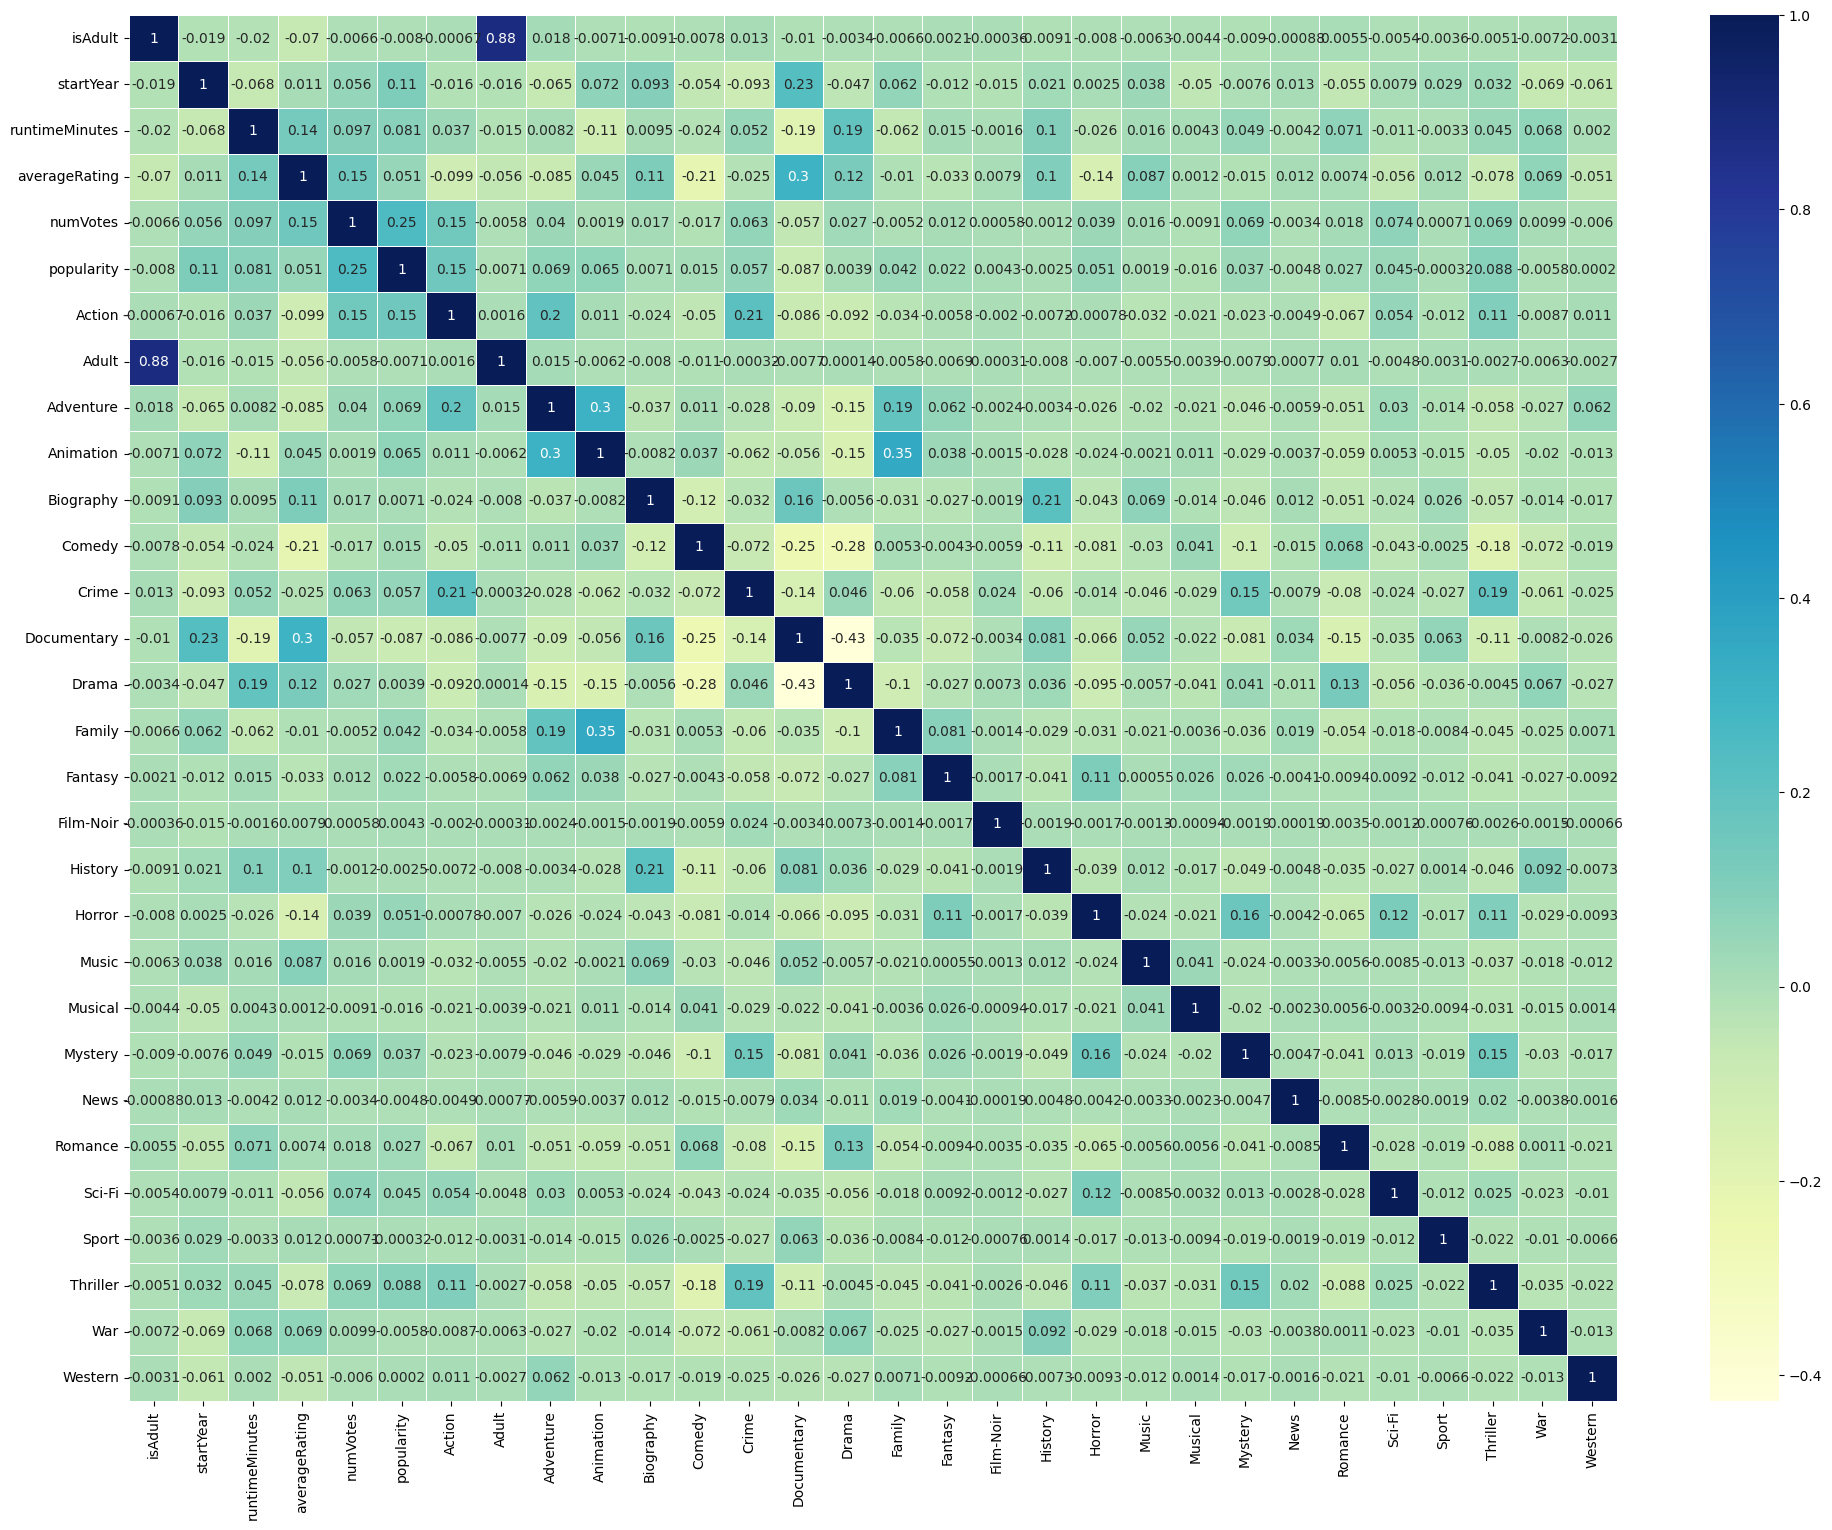

In [52]:
exploration(df_FR)

# 5. Machine Learning

In [119]:
df_FR.head(3)

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,poster_path,overview,popularity,production_countries,nconst,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0002898,germinal,0.0,1913,150.0,6.8,177,https://image.tmdb.org/t/p/original/yQfuyrNOTF...,"Based on Emile Zola's novel, an uncompromising...",0.840,['FR'],nm0135052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0003883,l'enfant de paris,0.0,1913,124.0,7.2,456,https://image.tmdb.org/t/p/original/3YJ9AIvoNu...,The young daughter of an army captain missing ...,1.111,['FR'],nm0674600,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0006206,les vampires,0.0,1915,421.0,7.3,5470,https://image.tmdb.org/t/p/original/8jO0Zmd468...,Paris is prey to an invisible terror against w...,4.836,['FR'],nm0275421,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
df_FR_short= df_FR.drop(columns=['poster_path','overview','popularity','production_countries','nconst']).copy()

In [121]:
#Rating Overview
movie_clustering=df_FR_short[['tconst','numVotes', 'averageRating']].groupby('tconst').first()
movie_clustering.head()

,numVotes,averageRating
tconst,,
tt0002898,177,6.8
tt0003883,456,7.2
tt0006206,5470,7.3
tt0006886,1145,7.2
tt0007518,22,5.7


In [122]:
#Normalizing Movie Ratings(between 0 and 1)
#we need it for distance metrics

movie_rating_number=pd.DataFrame(movie_clustering['numVotes'])
movie_rating_number_shaped= movie_rating_number.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movie_rating_number_shaped.head()

,numVotes
tconst,
tt0002898,0.000108
tt0003883,0.000282
tt0006206,0.003418
tt0006886,0.000713
tt0007518,0.000011


In [123]:
#After normalizing movie ratings (Maximum= 1.0)
movie_rating_number_shaped.loc[movie_rating_number_shaped['numVotes'].idxmax()]

numVotes    1.0
Name: tt0361748, dtype: float64

In [124]:
#After normalizing movie ratings (Minimum= 0.0)
movie_rating_number_shaped.loc[movie_rating_number_shaped['numVotes'].idxmin()]

numVotes    0.0
Name: tt0373411, dtype: float64

In [126]:
df_FR_short.columns

Index(['tconst', 'title', 'isAdult', 'startYear', 'runtimeMinutes',
       'averageRating', 'numVotes', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [154]:
#save the dataset
df_FR_short.to_csv('IMDB_Dataframe_short.csv', index=False)

In [155]:
df_FR_short.head(2)

,tconst,title,isAdult,startYear,runtimeMinutes,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0002898,germinal,0.0,1913,150.0,6.8,177,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0003883,l'enfant de paris,0.0,1913,124.0,7.2,456,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
df_FR_short['startYear'].describe()

count    13127.000000
mean      1995.774358
std         23.972252
min       1912.000000
25%       1979.000000
50%       2004.000000
75%       2015.000000
max       2024.000000
Name: startYear, dtype: float64

In [156]:
df_FR_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13127 entries, 0 to 13126
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          13127 non-null  object 
 1   title           13127 non-null  object 
 2   isAdult         13127 non-null  float64
 3   startYear       13127 non-null  int64  
 4   runtimeMinutes  13127 non-null  float64
 5   averageRating   13127 non-null  float64
 6   numVotes        13127 non-null  int64  
 7   Action          13127 non-null  int64  
 8   Adult           13127 non-null  int64  
 9   Adventure       13127 non-null  int64  
 10  Animation       13127 non-null  int64  
 11  Biography       13127 non-null  int64  
 12  Comedy          13127 non-null  int64  
 13  Crime           13127 non-null  int64  
 14  Documentary     13127 non-null  int64  
 15  Drama           13127 non-null  int64  
 16  Family          13127 non-null  int64  
 17  Fantasy         13127 non-null 

In [157]:
dataframe=pd.read_csv('IMDB_Dataframe_short.csv')

In [158]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13127 entries, 0 to 13126
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          13127 non-null  object 
 1   title           13127 non-null  object 
 2   isAdult         13127 non-null  float64
 3   startYear       13127 non-null  int64  
 4   runtimeMinutes  13127 non-null  float64
 5   averageRating   13127 non-null  float64
 6   numVotes        13127 non-null  int64  
 7   Action          13127 non-null  int64  
 8   Adult           13127 non-null  int64  
 9   Adventure       13127 non-null  int64  
 10  Animation       13127 non-null  int64  
 11  Biography       13127 non-null  int64  
 12  Comedy          13127 non-null  int64  
 13  Crime           13127 non-null  int64  
 14  Documentary     13127 non-null  int64  
 15  Drama           13127 non-null  int64  
 16  Family          13127 non-null  int64  
 17  Fantasy         13127 non-null 

In [159]:
import csv

movdict={} # empty dict
with open('IMDB_Dataframe_short.csv',encoding='UTF-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)# skip first row name

    for column in csv_reader:

        fields=column

        name = fields[1].replace('\xa0', '') #remove unneccesary string elements

        movie_id_ = fields[0]

        genres = (fields[7:32])

        genres = list(map(int, genres))  #set integers

        year = fields[3]

        isAdult = fields[2]


        #concatenate the elements
        #Dictionary Key: movie id
        #Dictionary Values: movie name, genre list, popularity score, rating, year, isAdult
        movdict[movie_id_]=(name, genres, movie_rating_number_shaped.loc[movie_id_].get('numVotes'), movie_clustering.loc[movie_id_].averageRating, year,isAdult)



In [170]:
# returning the list with genre information horizontally instead of vertically
%pprint

Pretty printing has been turned OFF


In [163]:
#calculating the distance between two movies
#The higher the distance, the less similar 2 movies are

from scipy import spatial

#function takes 2 movie ids, a and b
#then calculate distance between those 2 movies(distance score)

def Computedistance(a,b):
    genresA=a[1]
    genresB=b[1]

    genreDistance=spatial.distance.cosine(genresA, genresB)

    popularityA=a[2]
    popularityB=b[2]

    popularityDistance=abs(popularityA-popularityB)

    #function will return result of genre distance + popularity distance
    return genreDistance + popularityDistance

In [166]:
#compute distance between one movie and all other movies in dictionary
#distance based on distance score
#function will calculate knn

import operator

def get_neighbors(movie_id_, k):

    #empty distance list
    distances=[]

    #distance between the first movie and all the other movies in dictionary
    for movie in movdict:
        if(movie!= movie_id_):
            dist= Computedistance(movdict[movie_id_], movdict[movie])
            distances.append((movie, dist))

            #sort result based on distance score
    distances.sort(key=operator.itemgetter(1))

    #when we have neighbors list, we go through each k value and append results
    #in neighbors list
    neighbors=[]
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

k=10
avg_rating=0
#finding 10 nearest neighbors, using get_neighbors function

# movie: The Godfather 2
neighbors=get_neighbors('tt0002898',k)

for neighbor in neighbors:
        avg_rating+=movdict[neighbor][3]
        print ('Movie : ', movdict[neighbor][0], '\n','AverageRating : ', str(movdict[neighbor][3]))

avg_rating /= float(k)

Movie :  les enfants du désordre 
 AverageRating :  6.3
Movie :  la mort d'un tueur 
 AverageRating :  6.6
Movie :  clair obscur 
 AverageRating :  5.5
Movie :  un couple 
 AverageRating :  5.4
Movie :  son nom de venise dans calcutta désert 
 AverageRating :  7.3
Movie :  je m'en sortirai|zaneta 
 AverageRating :  6.5
Movie :  le combat ordinaire 
 AverageRating :  5.6
Movie :  la terre 
 AverageRating :  6.7
Movie :  la revue des revues 
 AverageRating :  5.6
Movie :  pension mimosas 
 AverageRating :  7.0


In [167]:
neighbors

['tt0097279',
 'tt0058375',
 'tt2091893',
 'tt21374862',
 'tt0075243',
 'tt3686270',
 'tt3982760',
 'tt0012745',
 'tt0462506',
 'tt0026859']

In [168]:
# vérif
movdict['tt0002898']

('germinal',
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.00010757341885837083,
 6.8,
 '1913',
 '0.0')

In [169]:
print(movdict['tt0097279'])
print(movdict['tt0058375'])

('les enfants du désordre', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00010757341885837083, 6.3, '1989', '0.0')
("la mort d'un tueur", [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0001069479920045431, 6.6, '1964', '0.0')
